In [1]:
#Importar librerías:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objs as go

In [13]:
data_accidents = pd.read_csv("AccidentesAviones.csv", delimiter = ",")
data_accidents.head(2)
#data_2.columns

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [18]:
# Verificación del tipo de dato de la columna 'fecha':
data_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  5008 non-null   int64         
 1   Fecha               5008 non-null   datetime64[ns]
 2   Hora                5008 non-null   object        
 3   Lugar_Accidente     5008 non-null   object        
 4   Operador            5008 non-null   object        
 5   Nro_Vuelo           5008 non-null   object        
 6   Ruta_Vuelo          5008 non-null   object        
 7   Tipo_Aeronave       5008 non-null   object        
 8   Nro_Registro        5008 non-null   object        
 9   Nro_Serie           5008 non-null   object        
 10  Abordaje_Total      5008 non-null   object        
 11  Pasajeros_Abordo    5008 non-null   object        
 12  Tripulacion_Abordo  5008 non-null   object        
 13  Muertes_Vuelo       5008 non-null   object      

In [14]:
# Renombrar colummnas:
nombres_nuevos = {
    'Unnamed: 0': 'Id',
    'fecha': 'Fecha',
    'HORA declarada': 'Hora',
    'Ruta': 'Lugar_Accidente',
    'OperadOR': 'Operador',
    'flight_no': 'Nro_Vuelo',
    'route': 'Ruta_Vuelo',
    'ac_type': 'Tipo_Aeronave',
    'registration': 'Nro_Registro',
    'cn_ln': 'Nro_Serie',
    'all_aboard': 'Abordaje_Total',
    'PASAJEROS A BORDO': 'Pasajeros_Abordo',
    'crew_aboard': 'Tripulacion_Abordo',
    'cantidad de fallecidos': 'Muertes_Vuelo',
    'passenger_fatalities': 'Pasajeros_Muertos',
    'crew_fatalities': 'Tripulacion_Muerta',
    'ground': 'Muertes_En_Tierra',
    'summary': 'Resumen'
}

data_accidents.rename(columns=nombres_nuevos, inplace=True)

In [15]:
# Convertir columna 'fecha' de texto a tipo datetime:
data_accidents['Fecha'] = pd.to_datetime(data_accidents['Fecha'])
# Crear nuevas columnas para el año, mes y día
data_accidents['Año'] = data_accidents['Fecha'].dt.year
data_accidents['Mes'] = data_accidents['Fecha'].dt.month
data_accidents['Día'] = data_accidents['Fecha'].dt.day
# Verificación del tipo de dato de la columna 'fecha':
data_accidents.head(2)

,Id,Fecha,Hora,Lugar_Accidente,Operador,Nro_Vuelo,Ruta_Vuelo,Tipo_Aeronave,Nro_Registro,Nro_Serie,...,Pasajeros_Abordo,Tripulacion_Abordo,Muertes_Vuelo,Pasajeros_Muertos,Tripulacion_Muerta,Muertes_En_Tierra,Resumen,Año,Mes,Día
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,...,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,1,1909-09-07,?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,...,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,9,7


In [14]:
# Totales por columnas
data_accidents.nunique()

Id                    5008
Fecha                 4577
Hora                  1217
Lugar_Accidente       4125
Operador              2268
Nro_Vuelo              893
Ruta_Vuelo            3839
Tipo_Aeronave         2469
Nro_Registro          4701
Nro_Serie             3908
Abordaje_Total         245
Pasajeros_Abordo       235
Tripulacion_Abordo      35
Muertes_Vuelo          200
Pasajeros_Muertos      191
Tripulacion_Muerta      29
Muertes_En_Tierra       52
Resumen               4858
Año                    111
Mes                     12
Día                     31
Década                  13
dtype: int64

In [16]:
# Reemplazar '?' con 'Unknown' en columnas de texto
columnas_texto = ['Operador', 'Ruta_Vuelo', 'Tipo_Aeronave', 'Nro_Registro', 'Nro_Serie', 'Resumen']
data_accidents[columnas_texto] = data_accidents[columnas_texto].replace('?', 'Unknown')
# Reemplazar '?' con 0 en columnas numéricas
columnas_numericas = ['Abordaje_Total', 'Pasajeros_Abordo', 'Tripulacion_Abordo', 'Muertes_Vuelo', 'Pasajeros_Muertos', 'Tripulacion_Muerta', 'Muertes_En_Tierra']
data_accidents[columnas_numericas] = data_accidents[columnas_numericas].replace('?', 0)
data_accidents.head(2)


,Id,Fecha,Hora,Lugar_Accidente,Operador,Nro_Vuelo,Ruta_Vuelo,Tipo_Aeronave,Nro_Registro,Nro_Serie,...,Pasajeros_Abordo,Tripulacion_Abordo,Muertes_Vuelo,Pasajeros_Muertos,Tripulacion_Muerta,Muertes_En_Tierra,Resumen,Año,Mes,Día
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,Unknown,1,...,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,1,1909-09-07,?,"Juvisy-sur-Orge, France",Unknown,?,Air show,Wright Byplane,SC1,Unknown,...,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,9,7


In [34]:
# Verificar las nuevas columnas:
data_accidents.nunique()

Id                    5008
Fecha                 4577
Hora                  1217
Lugar_Accidente       4125
Operador              2268
Nro_Vuelo              893
Ruta_Vuelo            3839
Tipo_Aeronave         2469
Nro_Registro          4701
Nro_Serie             3908
Abordaje_Total         245
Pasajeros_Abordo       235
Tripulacion_Abordo      35
Muertes_Vuelo          200
Pasajeros_Muertos      191
Tripulacion_Muerta      29
Muertes_En_Tierra       52
Resumen               4858
Año                    111
Mes                     12
Día                     31
dtype: int64

In [35]:
#Se analizan los distintos valores de la columna Operador para identificar posibles análisis
data_accidents.Operador.value_counts()

Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: Operador, Length: 2268, dtype: int64

In [17]:
# Dividir la columna 'Operador' por la coma y crea una columna 'temporal'
data_accidents['Temp'] = data_accidents['Operador'].str.split(' ').str[0]
# Crear nueva columna indicando si el vuelo es militar
data_accidents['Militar'] = [True if m == 'Military' else False for m in data_accidents['Temp']]
# Eliminar la columna temporal 'Temp':
data_accidents.drop(columns=['Temp'], inplace=True)
data_accidents.head(2)

,Id,Fecha,Hora,Lugar_Accidente,Operador,Nro_Vuelo,Ruta_Vuelo,Tipo_Aeronave,Nro_Registro,Nro_Serie,...,Tripulacion_Abordo,Muertes_Vuelo,Pasajeros_Muertos,Tripulacion_Muerta,Muertes_En_Tierra,Resumen,Año,Mes,Día,Militar
0,0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,Unknown,1,...,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908,9,17,True
1,1,1909-09-07,?,"Juvisy-sur-Orge, France",Unknown,?,Air show,Wright Byplane,SC1,Unknown,...,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909,9,7,False


In [18]:
# Verificamos la cantidad de accidentes en vuelos militares y no militares
data_accidents.Militar.value_counts()

Militar
False    4263
True      745
Name: count, dtype: int64

In [8]:
# Tipo de aeronave con más cantidad de accidentes
top_Tipo_Aeronave = data_accidents['Tipo_Aeronave'].value_counts()
top_Tipo_Aeronave.head(10)

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
De Havilland DH-4                            27
Douglas C-47B                                27
Name: Tipo_Aeronave, dtype: int64

In [19]:
data_accidents['Abordaje_Total'] = data_accidents['Abordaje_Total'].astype('int64')
data_accidents['Tripulacion_Abordo'] = data_accidents['Tripulacion_Abordo'].astype('int64')
data_accidents['Muertes_Vuelo'] = data_accidents['Muertes_Vuelo'].astype('int64')
data_accidents['Pasajeros_Muertos'] = data_accidents['Pasajeros_Muertos'].astype('int64')
data_accidents['Muertes_En_Tierra'] = data_accidents['Muertes_En_Tierra'].astype('int64')
data_accidents['Tripulacion_Muerta'] = data_accidents['Tripulacion_Muerta'].astype('int64')
data_accidents['Pasajeros_Abordo'] = data_accidents['Pasajeros_Abordo'].astype('int64')
data_accidents.dtypes

Id                             int64
Fecha                 datetime64[ns]
Hora                          object
Lugar_Accidente               object
Operador                      object
Nro_Vuelo                     object
Ruta_Vuelo                    object
Tipo_Aeronave                 object
Nro_Registro                  object
Nro_Serie                     object
Abordaje_Total                 int64
Pasajeros_Abordo               int64
Tripulacion_Abordo             int64
Muertes_Vuelo                  int64
Pasajeros_Muertos              int64
Tripulacion_Muerta             int64
Muertes_En_Tierra              int64
Resumen                       object
Año                            int32
Mes                            int32
Día                            int32
Militar                         bool
dtype: object

In [20]:
data_accidents.describe()

,Id,Abordaje_Total,Pasajeros_Abordo,Tripulacion_Abordo,Muertes_Vuelo,Pasajeros_Muertos,Tripulacion_Muerta,Muertes_En_Tierra,Año,Mes,Día,Década
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,2503.500000,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1.703275,1970.851637,6.696086,15.785743,1966.253994
std,1445.829404,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,55.251400,24.703696,3.529370,8.798060,24.929399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000,1.000000,1.000000,1900.000000
25%,1251.750000,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1951.000000,4.000000,8.000000,1950.000000
50%,2503.500000,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,0.000000,1970.000000,7.000000,16.000000,1970.000000
75%,3755.250000,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,0.000000,1992.000000,10.000000,23.000000,1990.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000,12.000000,31.000000,2020.000000


In [20]:
# Agrupar por la columna y contar las ocurrencias
conteo = data_accidents['Año'].value_counts()
# Obtener las 10 con las mayores cantidades
top_10_Anio = conteo.head(10)
top_10_Anio


Año
1946    88
1989    83
1947    82
1948    78
1962    78
1972    77
1945    75
1951    75
1994    74
1970    73
Name: count, dtype: int64

In [12]:
# Crear una nueva columna "Década" que agrupa los años en décadas
data_accidents['Década'] = (data_accidents['Año'] // 10) * 10
# Contar el número de accidentes por década
data_accidents['Década'].value_counts()

1950    652
1960    645
1990    631
1970    612
1940    580
1980    553
2000    507
1930    360
2010    238
1920    182
1910     31
2020     15
1900      2
Name: Década, dtype: int64

## Gráficas

<AxesSubplot:>

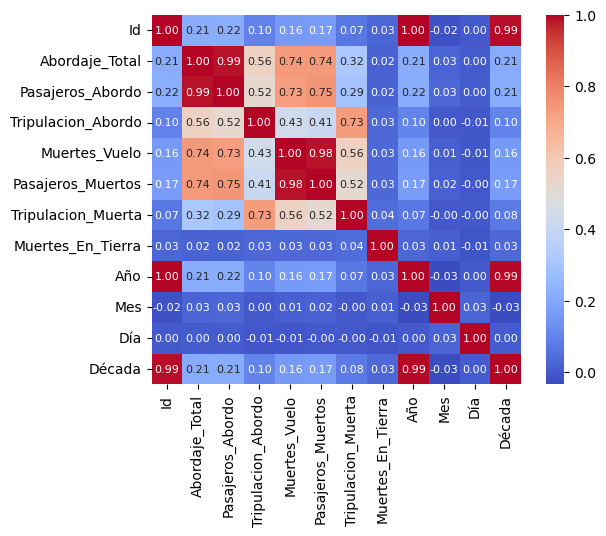

In [21]:
# Verifico la relación de las variables
corr = data_accidents.corr()
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 8}, cmap = 'coolwarm')

Pasajeros_Abordo 
Tripulacion_Abordo            
Muertes_Vuelo                 
Pasajeros_Muertos             
Tripulacion_Muerta            
Muertes_En_Tierra             
Resumen                       
Ruta_Origen                   
Ruta_Destino                  
Tipo_Operador                 
Otro_Tipo_Operador            
Año                            
Mes                            
Día                            
Década  

## Verificación de Outliers                       

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

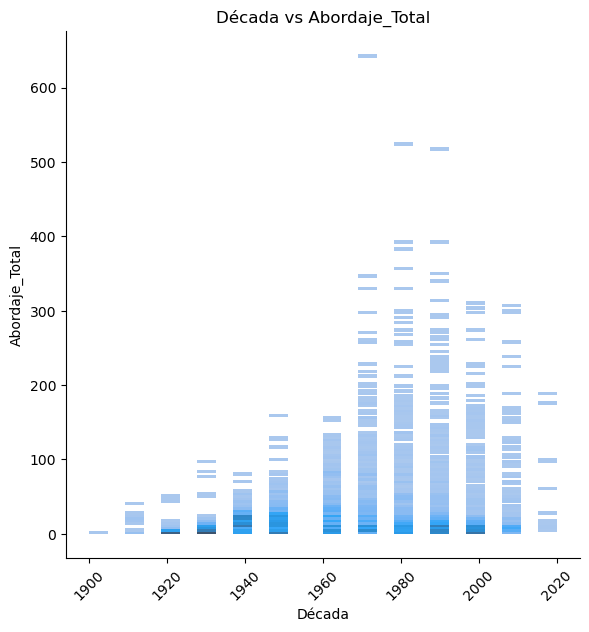

In [87]:
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 100})
figure = sns.displot(data=data_accidents, x='Década', y="Abordaje_Total", height=6) 
plt.title("Década vs Abordaje_Total")
plt.xticks(rotation=45)

c:\Users\n_sar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mes'>

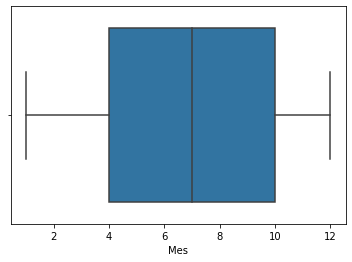

In [55]:
#Box Plot
sns.boxplot(data_accidents['Mes'])  

In [109]:
data_accidents['Tripulacion_Abordo'].describe()

count    5008.000000
mean        4.321885
std         3.789422
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        83.000000
Name: Tripulacion_Abordo, dtype: float64

<AxesSubplot:xlabel='Década', ylabel='Tripulacion_Abordo'>

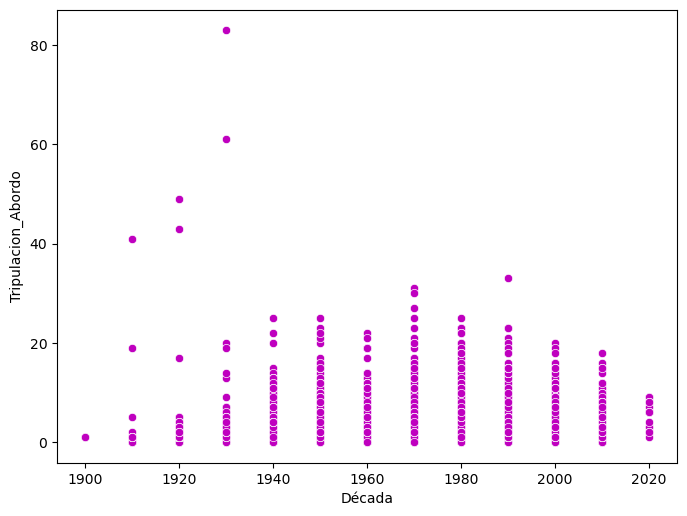

In [86]:
#sns.set_theme(style="darkgrid")        
sns.scatterplot(data=data_accidents, x="Década", y="Tripulacion_Abordo", color="m") 

In [110]:
data_accidents['Abordaje_Total'].describe()

count    5008.000000
mean       31.015575
std        45.438768
min         0.000000
25%         6.000000
50%        16.000000
75%        34.250000
max       644.000000
Name: Abordaje_Total, dtype: float64

<AxesSubplot:xlabel='Década', ylabel='Abordaje_Total'>

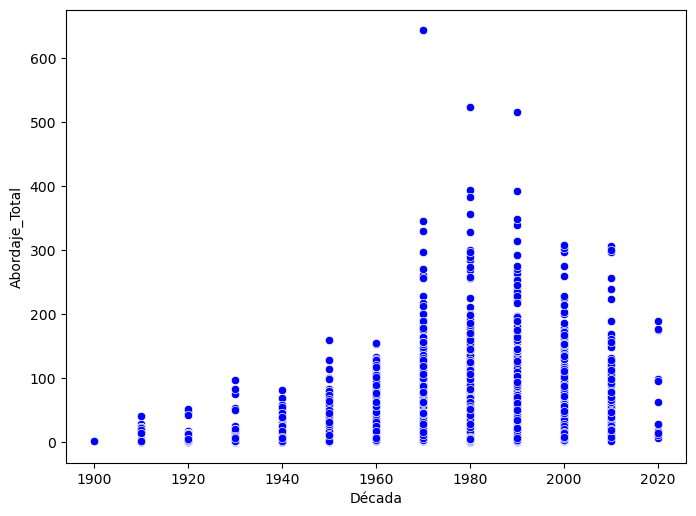

In [108]:
sns.scatterplot(data=data_accidents, x="Década", y="Abordaje_Total", color="b") 

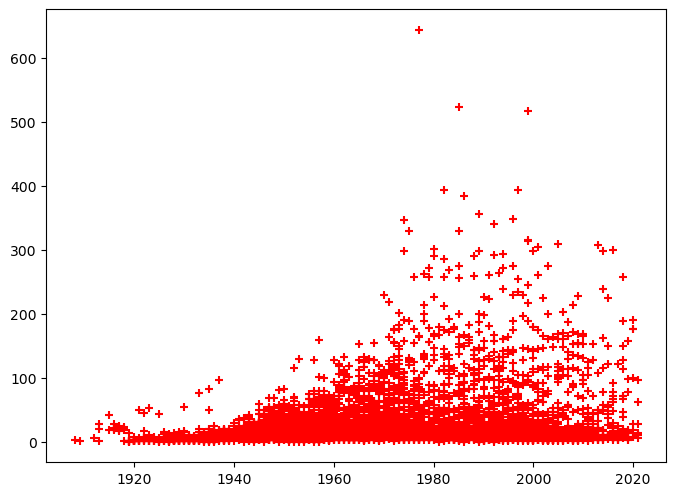

In [122]:
# Graficamos el modelo
#plt.plot(y,y, '-.',c='grey')
plt.scatter(data_accidents.Año, data_accidents["Muertes_En_Tierra"], s=30, c='r', marker='+', zorder=10)
plt.show()

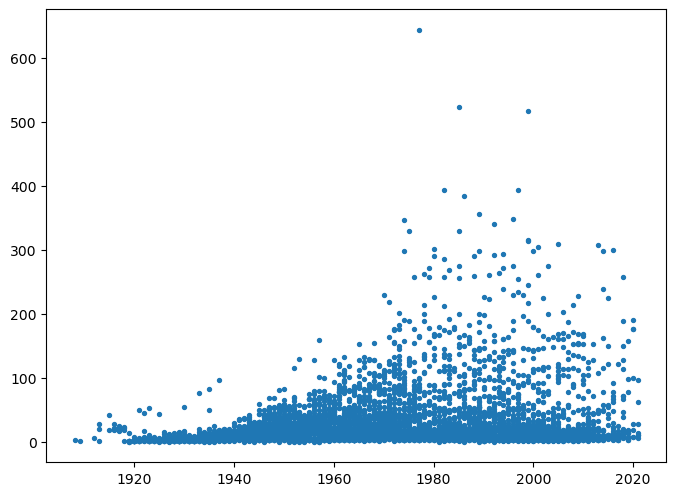

In [112]:
# Dibujamos la dispersión 
plt.scatter(data_accidents.Año, data_accidents["Muertes_En_Tierra"], s=8)
plt.show()

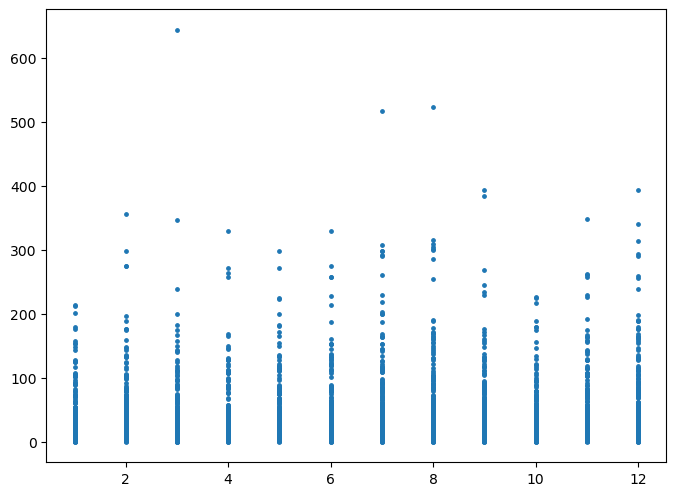

In [113]:
# Dibujamos la dispersión 
plt.scatter(data_accidents.Mes, data_accidents["Muertes_En_Tierra"], s=6)
plt.show()

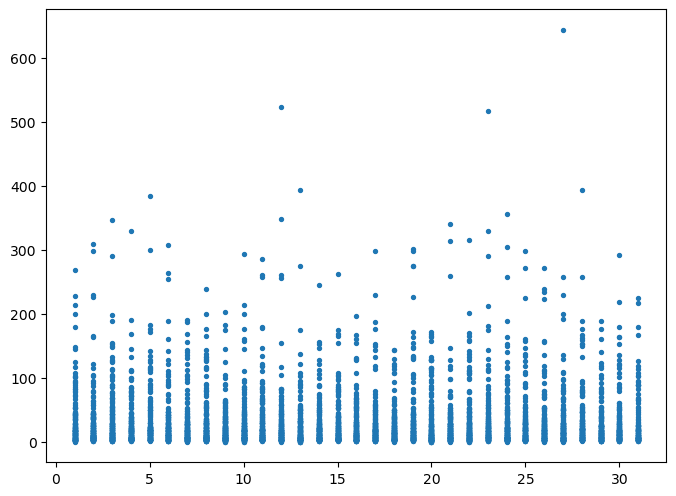

In [114]:
# Dibujamos la dispersión 
plt.scatter(data_accidents.Día, data_accidents["Muertes_En_Tierra"], s=8)
plt.show()

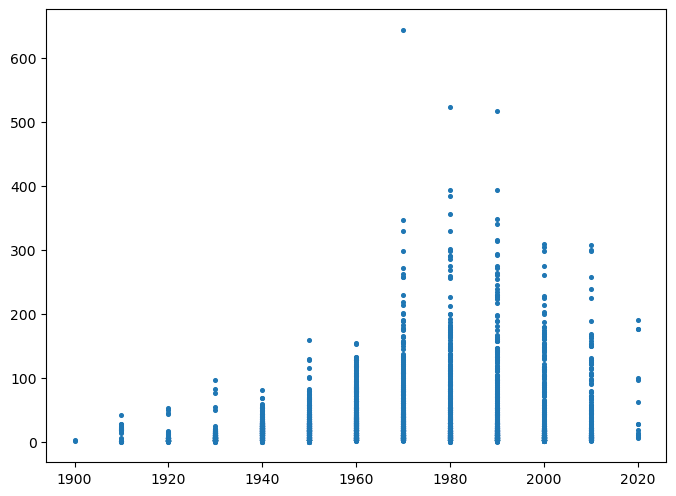

In [117]:
# Dibujamos la dispersión 
plt.scatter(data_accidents.Década, data_accidents["Muertes_En_Tierra"], s=7)
plt.show()

<AxesSubplot:xlabel='Década', ylabel='count'>

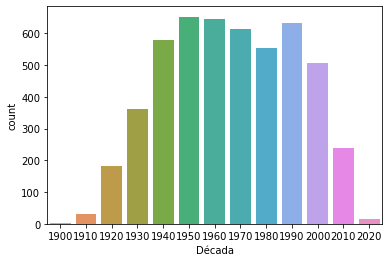

In [77]:
sns.countplot(data=data_accidents,x='Década')

<AxesSubplot:xlabel='Mes', ylabel='count'>

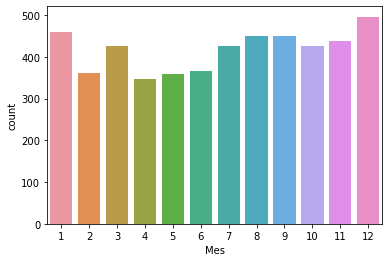

In [70]:
sns.countplot(data=data_accidents,x='Mes')

<AxesSubplot:xlabel='Abordaje_Total', ylabel='count'>

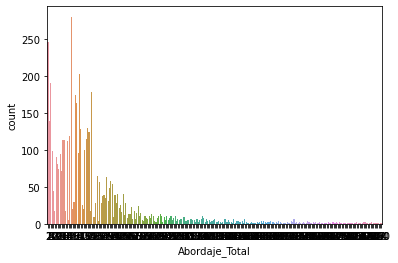

In [78]:
sns.countplot(data=data_accidents,x='Abordaje_Total') 

<AxesSubplot:xlabel='count', ylabel='Mes'>

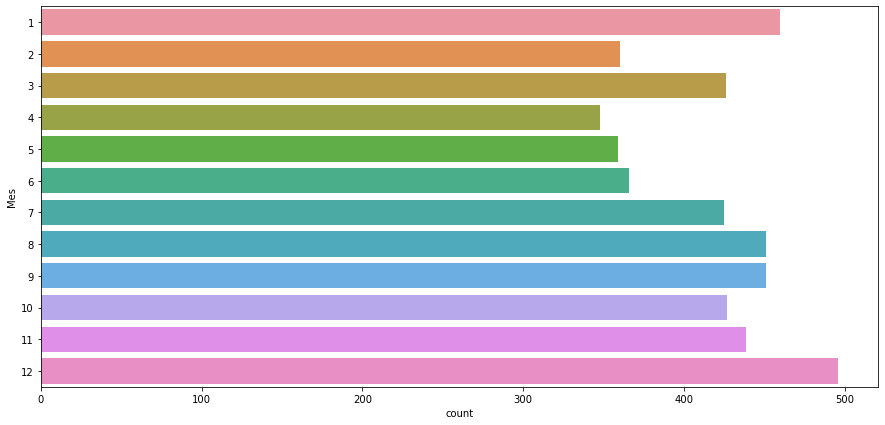

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(data=data_accidents,y='Mes')

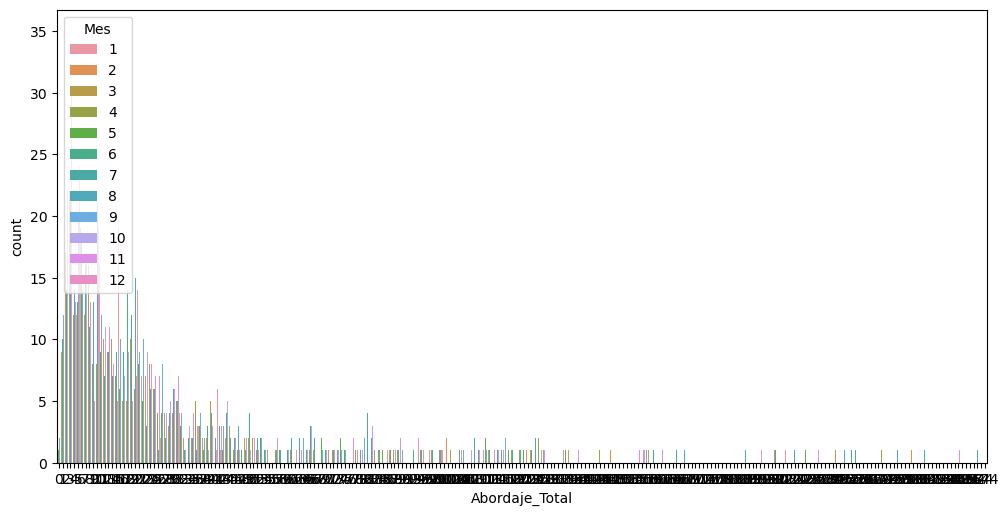

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(data=data_accidents,x='Abordaje_Total', hue='Mes')
plt.show()

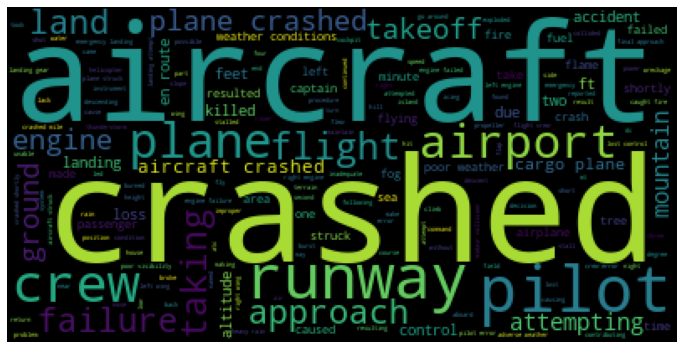

In [49]:
titles=''.join(data_accidents.Resumen).lower()

plt.figure(figsize=(12,10))
wordcloud = WordCloud(collocations=True, max_words=250).generate(titles)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Análisis del dataset extra

In [8]:
Data_Tickets = pd.read_excel("Data_Tickets.xlsx")
Data_Tickets.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [9]:
Data_Tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
Data_Tickets.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
#Se analizan los distintos valores de la columna Operador para identificar posibles análisis
Data_Tickets.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [21]:
data_accidents.Operador.value_counts()

Operador
Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: count, Length: 2268, dtype: int64

In [ ]:
data_accidents['Abordaje_Total'] = data_accidents['Abordaje_Total'].astype('int64')

In [ ]:
data_Flights = pd.read_csv("Flights.csv", delimiter = ",")
data_Flights.head(2)

In [ ]:
data_Flights.info()